<a href="https://colab.research.google.com/github/Pranay3832/Colorado-Motor-Vehicle-Sales-Data/blob/main/Colorado_Motor_Vehicle_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Colorado Motor Vehicle Sales Data **

Made By : Pranay Kudale

### Step 1 : Importing Important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge # Using Ridge Regression as an alternative
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px # For interactive visualizations

### Step 2 : Loading the DataSet

In [3]:
df = pd.read_csv('/content/colorado_motor_vehicle_sales.csv')

# Display the first 5 rows of the dataframe
print("Data Head:")
display(df.head())

# Display information about the dataframe
print("\nData Info:")
display(df.info())

# Display the shape of the dataframe (number of rows and columns)
print("\nData Shape:")
display(df.shape)

Data Head:


,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


None


Data Shape:


(501, 4)

### Step 3 : Data Preprocessing

In [4]:
print("\nMissing values before handling:")
print(df.isnull().sum())

# Drop any rows with missing values (if any)
df.dropna(inplace=True)

# Create a 'period' column for time-series visualization, similar to the PDF's example
df['period'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)

# Sort by year and quarter for time-series analysis
df.sort_values(by=['year', 'quarter'], inplace=True)

print("\nDataFrame after preprocessing (head):")
print(df.head())



Missing values before handling:
year       0
quarter    0
county     0
sales      0
dtype: int64

DataFrame after preprocessing (head):
   year  quarter              county      sales   period
0  2008        1               Adams  231609000  2008 Q1
1  2008        1            Arapahoe  550378000  2008 Q1
2  2008        1  Boulder/Broomfield  176771000  2008 Q1
3  2008        1              Denver  200103000  2008 Q1
4  2008        1             Douglas   93259000  2008 Q1


### Step 4 : Exploratory Data Analysis (EDA)

1 Total Sales Over Time (Line Plot with Quarterly Aggregation)

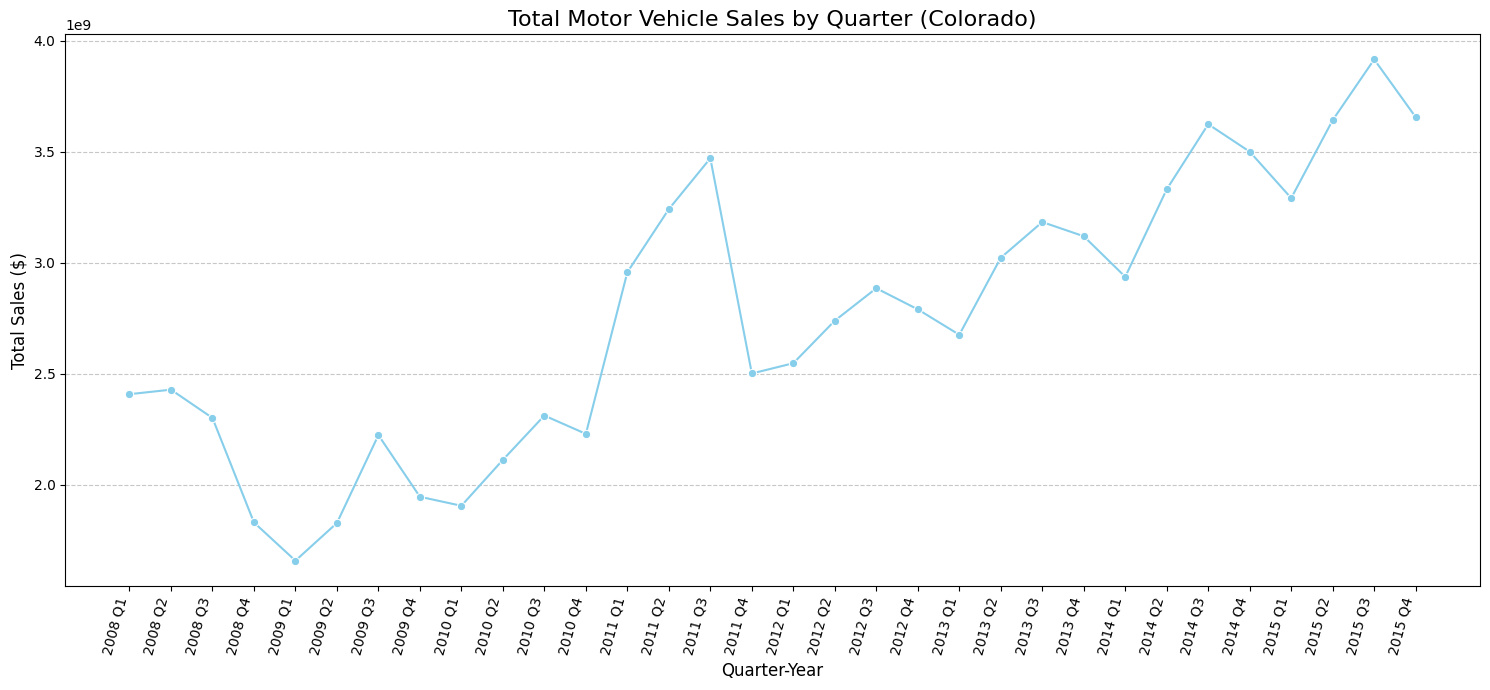

In [5]:
# Aggregate sales by the newly created 'period'
quarterly_sales = df.groupby('period')['sales'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=quarterly_sales, x='period', y='sales', marker='o', color='skyblue')
plt.title('Total Motor Vehicle Sales by Quarter (Colorado)', fontsize=16)
plt.xlabel('Quarter-Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


2 Sales Distribution by County (Bar Plot - Top N counties)

/tmp/ipython-input-208229418.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




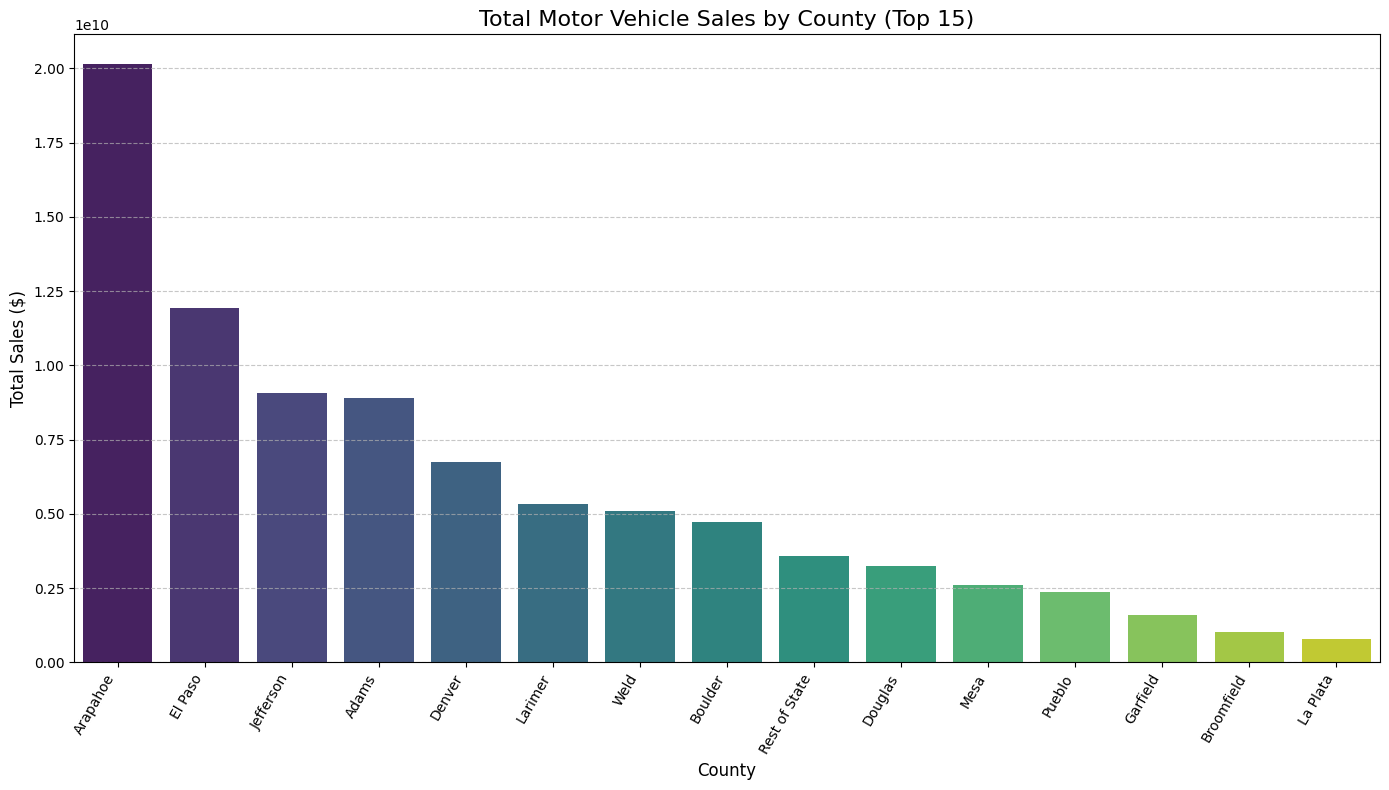

In [6]:
county_total_sales = df.groupby('county')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='county', y='sales', data=county_total_sales.head(15), palette='viridis') # Top 15 counties
plt.title('Total Motor Vehicle Sales by County (Top 15)', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3 Sales Trends for Top 5 Counties (Interactive Plotly Line Plot)

In [7]:
# Get top 5 counties
top_5_counties = county_total_sales['county'].head(5).tolist()
df_top_5 = df[df['county'].isin(top_5_counties)]

# Group by period and county to get sales for each
sales_by_county_period = df_top_5.groupby(['period', 'county'])['sales'].sum().reset_index()

fig = px.line(sales_by_county_period, x='period', y='sales', color='county',
              title='Motor Vehicle Sales Trends for Top 5 Counties',
              labels={'period': 'Quarter-Year', 'sales': 'Total Sales ($)', 'county': 'County'},
              hover_name='county')
fig.update_xaxes(tickangle=60)
fig.show()


### Step 5 : Predictive Modeling (Ridge Regression)

In [8]:
# Encode 'county' using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['county'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded[['year', 'quarter'] + [col for col in df_encoded.columns if 'county_' in col]]
y = df_encoded['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features ('year' and 'quarter')
scaler = StandardScaler()
X_train[['year', 'quarter']] = scaler.fit_transform(X_train[['year', 'quarter']])
X_test[['year', 'quarter']] = scaler.transform(X_test[['year', 'quarter']])

# Initialize and train the Ridge Regression model
# Ridge Regression is used here as an alternative to Random Forest or ARIMA.
# It's a linear model that handles multicollinearity well.
model = Ridge(alpha=1.0, random_state=42) # alpha is the regularization strength
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

### Step 6 : Model Evaluation

In [9]:
print("\n--- Model Evaluation (Ridge Regression) ---")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.2f}")



--- Model Evaluation (Ridge Regression) ---
Mean Absolute Error (MAE): 31144508.18
Mean Squared Error (MSE): 1894292779123482.25
Root Mean Squared Error (RMSE): 43523473.89
R-squared (R2): 0.93


Visualize Actual vs. Predicted Sales

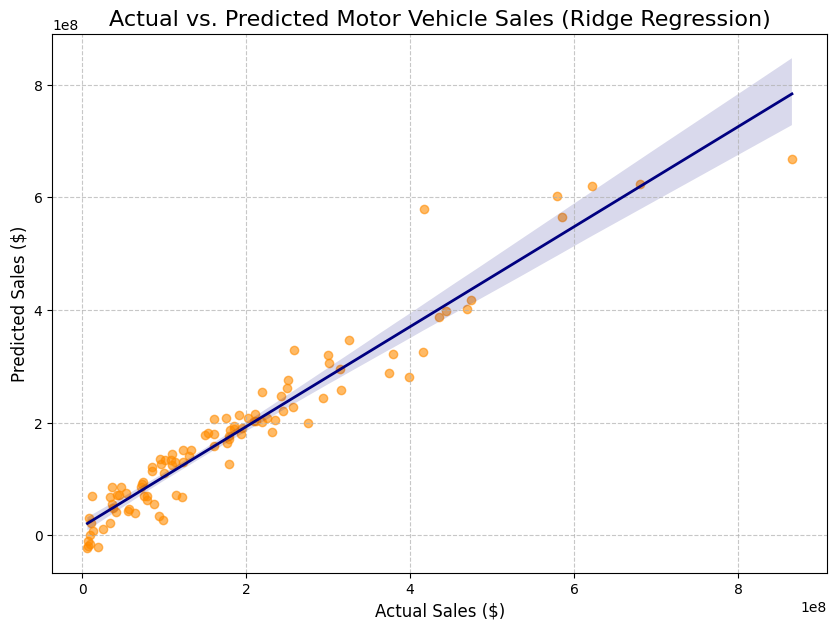

In [10]:
plt.figure(figsize=(10, 7))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6, 'color':'darkorange'}, line_kws={'color':'navy', 'lw':2})
plt.title('Actual vs. Predicted Motor Vehicle Sales (Ridge Regression)', fontsize=16)
plt.xlabel('Actual Sales ($)', fontsize=12)
plt.ylabel('Predicted Sales ($)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()


In [11]:
print("\nThis code performs an analysis and prediction on the Colorado Motor Vehicle Sales Data.")
print("It includes comprehensive EDA with a focus on quarterly and county-wise trends,")
print("and uses Ridge Regression for predictive modeling, distinct from the ARIMA and Random Forest examples in previous contexts.")
print("Interactive plots with Plotly are also introduced for enhanced visualization.")



This code performs an analysis and prediction on the Colorado Motor Vehicle Sales Data.
It includes comprehensive EDA with a focus on quarterly and county-wise trends,
and uses Ridge Regression for predictive modeling, distinct from the ARIMA and Random Forest examples in previous contexts.
Interactive plots with Plotly are also introduced for enhanced visualization.
